In [17]:
Importing Libraries
# Import necessary libraries for data handling and visualization
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# uploading the data
from google.colab import files
uploaded = files.upload()

Saving EastWestAirlines.csv to EastWestAirlines (3).csv


In [59]:
Airline = pd.read_csv("//content/EastWestAirlines.csv")

In [60]:
# Normalization function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Airline_df = scaler.fit_transform(Airline.iloc[:,1:])

In [61]:
# getting the data into a dataframe object
df = pd.read_csv('EastWestAirlines (2).csv')
df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [19]:
# Getting basic information about the data
print('Shape :',df.shape)
print('Number of rows:',df.shape[0])
print('Number of columns :', df.shape[1])

Shape : (3999, 12)
Number of rows: 3999
Number of columns : 12


In [20]:
# Getting an idea about the NULL values
df.isnull().sum().any()

False

In [21]:
# Getting an idea about the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [22]:
import numpy as np

In [23]:
print("Missing values per column before handling:")
print(df.isnull().sum())

Missing values per column before handling:
ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64


In [24]:
from scipy import stats

df_numeric = df.select_dtypes(include=[np.number])

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df_numeric))

# Define a threshold for Z-score (commonly 3 or 3.5)
threshold = 3
mask = (z_scores < threshold).all(axis=1)

print("Number of data points before removing outliers:", len(df))
print("Number of data points after removing outliers:", mask.sum())

# Filter the DataFrame
df_clean = df[mask].copy()

Number of data points before removing outliers: 3999
Number of data points after removing outliers: 3630


In [25]:
# Select features for clustering
features = ["Balance", "Qual_miles", "cc1_miles", "cc2_miles", "cc3_miles", "Bonus_miles", "Bonus_trans", "Flight_miles_12mo", "Flight_trans_12", "Days_since_enroll", "Award"]
df[features]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [26]:
# Standardize the data for better clustering performance
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

In [ ]:
scaled_data

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


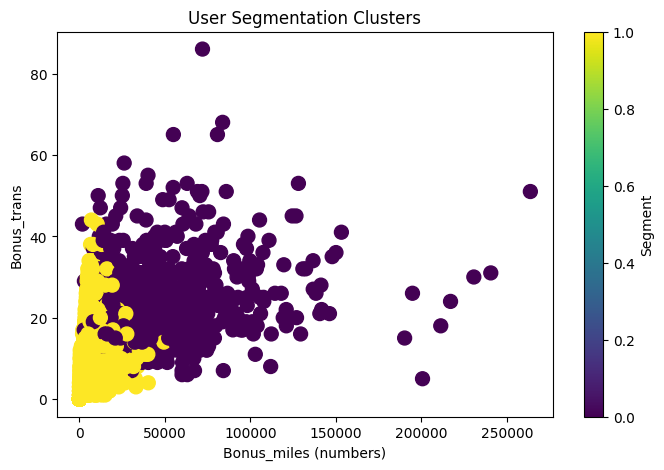

In [29]:
# Plot Bonus_miles vs Bonus_trans, colored by cluster
plt.figure(figsize=(8, 5))
plt.scatter(df['Bonus_miles'], df['Bonus_trans'], c=df['segment'], cmap='viridis', s=100)
plt.xlabel('Bonus_miles (numbers)')
plt.ylabel('Bonus_trans')
plt.title('User Segmentation Clusters')
plt.colorbar(label='Segment')
plt.show()

In [30]:
print("Segmented User Data:")
print(df)

Segmented User Data:
        ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      

In [31]:
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

In [32]:
range(1,4)

range(1, 4)

In [33]:
for i in range(1,4):
  print(i)

1
2
3


In [36]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    if i > 2:
      break

In [37]:
wcss

[43989.0000000001, 35409.516629861384, 32901.45804218546]

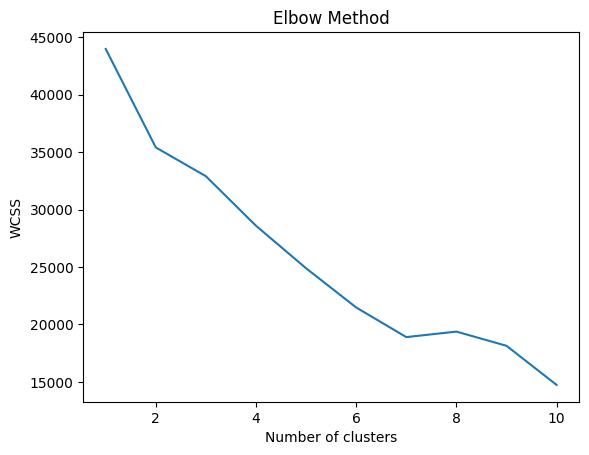

In [38]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [40]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(7, random_state=42)
clusters_new.fit(scaled_data)

KMeans(n_clusters=7, random_state=42)

In [47]:
clusters_new.labels_

array([2, 2, 2, ..., 0, 3, 3], dtype=int32)

In [62]:
#Assign clusters to the data set
Airline['clusterid_new'] = clusters_new.labels_

In [63]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-0.13995419,  0.40514436, -0.56301216,  0.06926621, -0.06276658,
        -0.39094605, -0.31023085,  0.0124549 ,  0.03068007,  0.03110468,
         1.25270734],
       [ 0.05069648, -0.09146528,  1.30401572, -0.09824189, -0.03999982,
         1.00986793,  0.79757906, -0.06413668, -0.0617856 ,  0.35392482,
         1.30391816],
       [-0.24947548, -0.1461148 , -0.66792419,  0.07190857, -0.05663916,
        -0.56830135, -0.53578797, -0.20000078, -0.22118934,  0.73276476,
        -0.7669193 ],
       [-0.41927157, -0.11323965, -0.69036597, -0.0125    , -0.06276658,
        -0.58038356, -0.60304443, -0.22572289, -0.24946219, -1.03118959,
        -0.7669193 ],
       [ 0.61534428,  0.5263771 ,  0.07884697,  0.2432846 , -0.06276658,
         0.60097119,  1.86081583,  4.13957726,  4.3439118 ,  0.14760455,
         0.85146628],
       [ 4.42662488,  0.40657169,  1.25264543, -0.02126906,  0.11186483,
         2.21423977,  1.16804514,  0.65306927,  0.89922725,  0.97854625,
         0.997

In [73]:
Airline.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [76]:
Airline[Airline['clusterid_new']==6]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,6
30,31,177926,0,3,1,1,20797,13,0,0,7886,0,6
32,33,276571,0,4,1,1,42044,23,0,0,7872,0,6
44,45,121260,0,3,1,1,18493,18,0,0,7808,0,6
56,57,75971,0,4,1,1,34339,14,0,0,6869,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3967,3990,26504,0,2,1,1,10599,29,1000,7,1445,0,6
3974,3997,58387,0,3,1,1,14581,39,0,0,1435,0,6
3980,4003,28867,0,3,1,1,19169,28,0,0,1425,0,6
3985,4008,59017,0,4,1,1,34746,25,0,0,1418,0,6


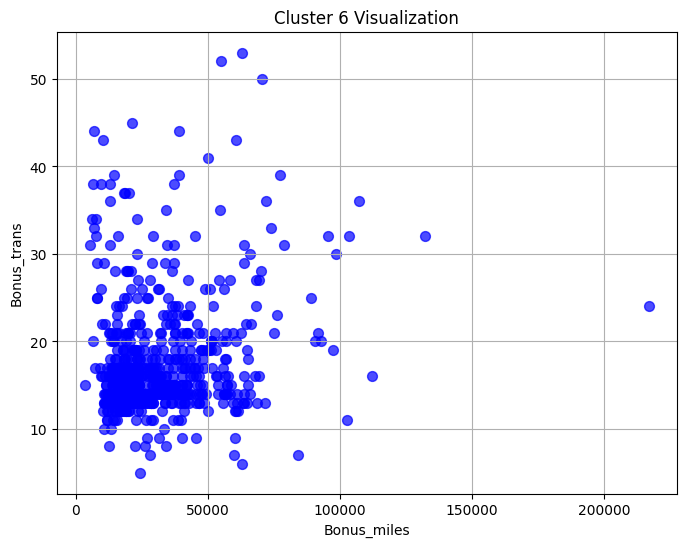

In [91]:
import matplotlib.pyplot as plt

# Filter the DataFrame to rows where clusterid_new == 6
cluster_data = Airline[Airline['clusterid_new'] == 6]

# Choose features to plot (for example, 'Bonus_miles' vs 'Bonus_trans')
x_feature = 'Bonus_miles'
y_feature = 'Bonus_trans'

plt.figure(figsize=(8, 6))
plt.scatter(cluster_data[x_feature], cluster_data[y_feature], c='blue', s=50, alpha=0.7)
plt.title('Cluster 6 Visualization')
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.grid(True)
plt.show()

In [77]:
Airline[Airline['clusterid_new']==5]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new
43,44,619393,0,3,1,1,15008,14,0,0,7819,1,5
72,74,550367,0,3,1,1,12500,13,50,1,7801,0,5
87,90,609477,0,3,1,1,21422,22,1200,8,6820,0,5
117,120,969559,0,1,1,1,2500,3,1000,2,7718,1,5
121,124,205126,0,5,1,1,126630,45,2250,10,7668,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2564,2583,518960,0,1,1,1,15700,8,200,1,2819,1,5
2938,2960,310226,0,4,1,1,61894,28,1700,9,2900,1,5
3040,3062,449205,1121,1,1,1,4750,9,3250,8,3071,1,5
3137,3159,298505,0,5,1,1,130647,32,600,2,2483,1,5


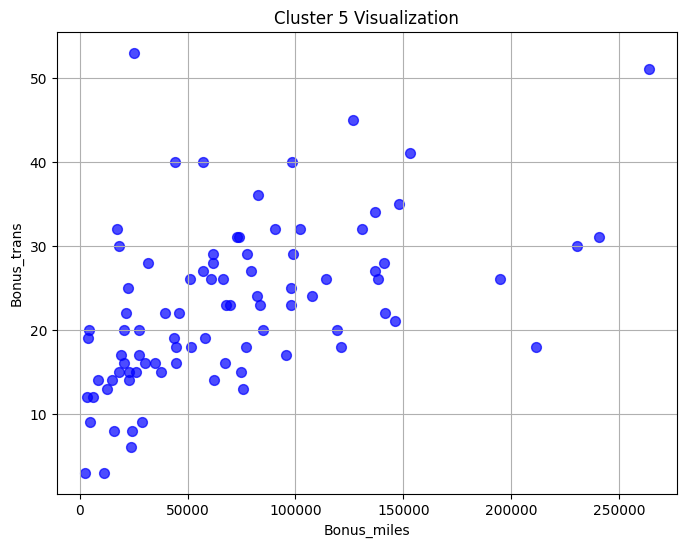

In [96]:
import matplotlib.pyplot as plt

# Filter the DataFrame to rows where clusterid_new == 5
cluster_data = Airline[Airline['clusterid_new'] == 5]

# Choose features to plot (for example, 'Bonus_miles' vs 'Bonus_trans')
x_feature = 'Bonus_miles'
y_feature = 'Bonus_trans'

plt.figure(figsize=(8, 6))
plt.scatter(cluster_data[x_feature], cluster_data[y_feature], c='blue', s=50, alpha=0.7)
plt.title('Cluster 5 Visualization')
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.grid(True)
plt.show()

In [78]:
Airline[Airline['clusterid_new']==4]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,4
65,66,53914,0,3,1,1,33767,45,5550,29,6826,1,4
94,97,185549,0,5,1,1,110859,39,2950,16,6778,1,4
112,115,124198,0,5,1,1,66330,23,4833,10,7710,0,4
127,130,213150,0,4,1,1,56308,41,5200,14,7645,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,3930,126490,0,1,1,1,8808,15,5183,12,1566,0,4
3911,3934,55922,2273,1,1,1,8104,19,4104,16,1552,0,4
3917,3940,130748,0,4,1,1,65510,37,6349,7,1545,0,4
3934,3957,76595,0,1,1,1,10577,2,9577,1,1515,0,4


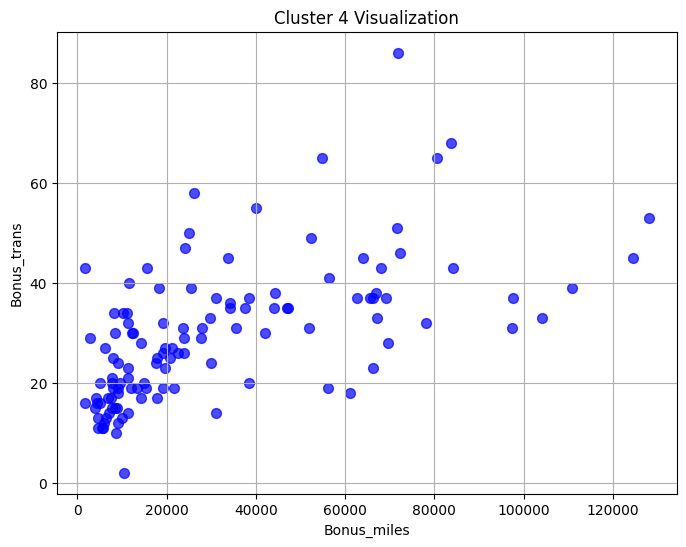

In [104]:
import matplotlib.pyplot as plt

# Filter the DataFrame to rows where clusterid_new == 4
cluster_data = Airline[Airline['clusterid_new'] == 4]

# Choose features to plot (for example, 'Bonus_miles' vs 'Bonus_trans')
x_feature = 'Bonus_miles'
y_feature = 'Bonus_trans'

plt.figure(figsize=(8, 6))
plt.scatter(cluster_data[x_feature], cluster_data[y_feature], c='blue', s=50, alpha=0.7)
plt.title('Cluster 4 Visualization')
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.grid(True)
plt.show()

In [79]:
Airline[Airline['clusterid_new']==3]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new
1129,1141,1625,0,1,1,1,1375,4,0,0,1547,0,3
1424,1438,22093,0,3,1,1,14857,11,200,1,2587,0,3
1431,1445,44665,0,1,1,1,333,2,333,2,3601,0,3
1549,1564,65021,0,2,1,1,10369,12,0,0,3547,0,3
1552,1567,6341,0,1,1,1,3658,12,0,0,3706,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,4013,11310,0,1,1,1,5021,2,0,0,1409,0,3
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,3
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,3


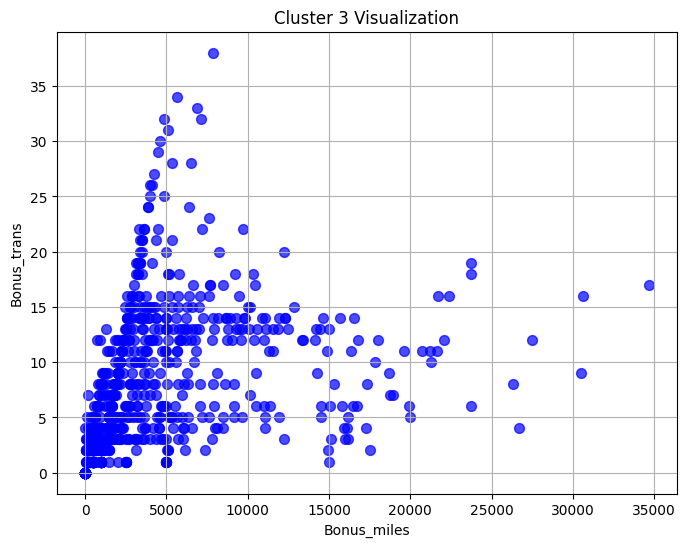

In [106]:
import matplotlib.pyplot as plt

# Filter the DataFrame to rows where clusterid_new == 3
cluster_data = Airline[Airline['clusterid_new'] == 3]

# Choose features to plot (for example, 'Bonus_miles' vs 'Bonus_trans')
x_feature = 'Bonus_miles'
y_feature = 'Bonus_trans'

plt.figure(figsize=(8, 6))
plt.scatter(cluster_data[x_feature], cluster_data[y_feature], c='blue', s=50, alpha=0.7)
plt.title('Cluster 3 Visualization')
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.grid(True)
plt.show()

In [80]:
Airline[Airline['clusterid_new']==2]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
5,6,16420,0,1,1,1,0,0,0,0,6942,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2299,2317,27904,0,2,1,1,6622,17,0,0,3793,0,2
2300,2318,128620,0,2,1,1,7747,12,0,0,3789,0,2
2317,2335,10458,0,1,2,1,10458,12,0,0,3726,0,2
2421,2440,41062,0,1,2,1,8275,11,0,0,3356,0,2


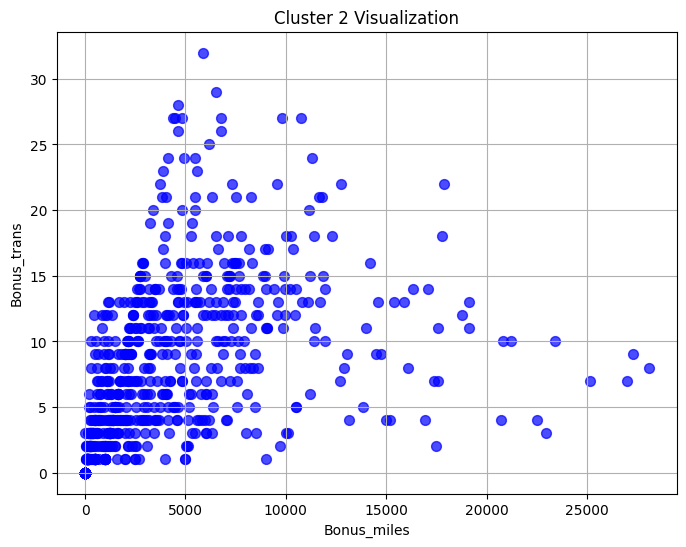

In [102]:
import matplotlib.pyplot as plt

# Filter the DataFrame to rows where clusterid_new == 2
cluster_data = Airline[Airline['clusterid_new'] == 2]

# Choose features to plot (for example, 'Bonus_miles' vs 'Bonus_trans')
x_feature = 'Bonus_miles'
y_feature = 'Bonus_trans'

plt.figure(figsize=(8, 6))
plt.scatter(cluster_data[x_feature], cluster_data[y_feature], c='blue', s=50, alpha=0.7)
plt.title('Cluster 2 Visualization')
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.grid(True)
plt.show()

In [81]:
Airline[Airline['clusterid_new']==1]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,1
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,1
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,1
16,17,51890,0,4,1,1,48963,16,0,0,6910,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3930,3953,40424,0,4,1,1,44110,26,343,3,1523,1,1
3931,3954,49519,0,3,1,1,25762,18,0,0,1522,1,1
3954,3977,33972,0,3,1,1,21029,29,0,0,1467,1,1
3973,3996,72297,0,3,1,1,16241,16,0,0,1587,1,1


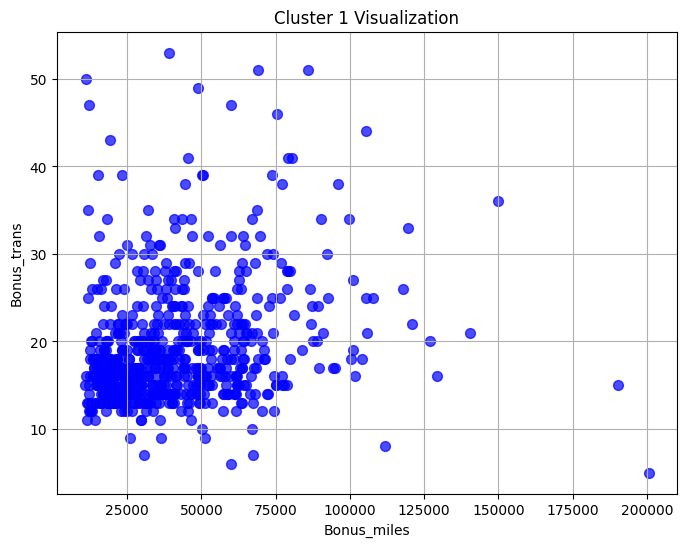

In [101]:
import matplotlib.pyplot as plt

# Filter the DataFrame to rows where clusterid_new == 1
cluster_data = Airline[Airline['clusterid_new'] == 1]

# Choose features to plot (for example, 'Bonus_miles' vs 'Bonus_trans')
x_feature = 'Bonus_miles'
y_feature = 'Bonus_trans'

plt.figure(figsize=(8, 6))
plt.scatter(cluster_data[x_feature], cluster_data[y_feature], c='blue', s=50, alpha=0.7)
plt.title('Cluster 1 Visualization')
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.grid(True)
plt.show()

In [75]:
Airline[Airline['clusterid_new']==0]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,0
17,18,13958,0,1,1,1,4291,5,0,0,6905,1,0
19,20,23354,0,3,1,1,10447,5,0,0,6896,1,0
21,22,185681,2024,1,1,1,13300,16,1800,9,6896,1,0
29,30,19221,0,1,1,1,4655,8,500,1,7896,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1,0
3989,4012,2622,0,1,1,1,1625,6,0,0,1404,1,0
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0


from matplotlib import pyplot as plt
_df_0['ID'].plot(kind='hist', bins=20, title='ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Balance'].plot(kind='hist', bins=20, title='Balance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Qual_miles'].plot(kind='hist', bins=20, title='Qual_miles')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['cc1_miles'].plot(kind='hist', bins=20, title='cc1_miles')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='ID', y='Balance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Balance', y='Qual_miles', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Qual_miles', y='cc1_miles', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='cc1_miles', y='cc2_miles', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ID']
  ys = series['Balance']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ID')
_ = plt.ylabel('Balance')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ID']
  ys = series['Qual_miles']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ID')
_ = plt.ylabel('Qual_miles')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ID']
  ys = series['cc1_miles']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ID')
_ = plt.ylabel('cc1_miles')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ID']
  ys = series['cc2_miles']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ID')
_ = plt.ylabel('cc2_miles')

from matplotlib import pyplot as plt
_df_12['ID'].plot(kind='line', figsize=(8, 4), title='ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Balance'].plot(kind='line', figsize=(8, 4), title='Balance')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Qual_miles'].plot(kind='line', figsize=(8, 4), title='Qual_miles')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['cc1_miles'].plot(kind='line', figsize=(8, 4), title='cc1_miles')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
import seaborn as sns

<ipython-input-86-b18c0589e69c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Bonus_miles', y = 'Bonus_trans', data = df, palette = 'Set3')


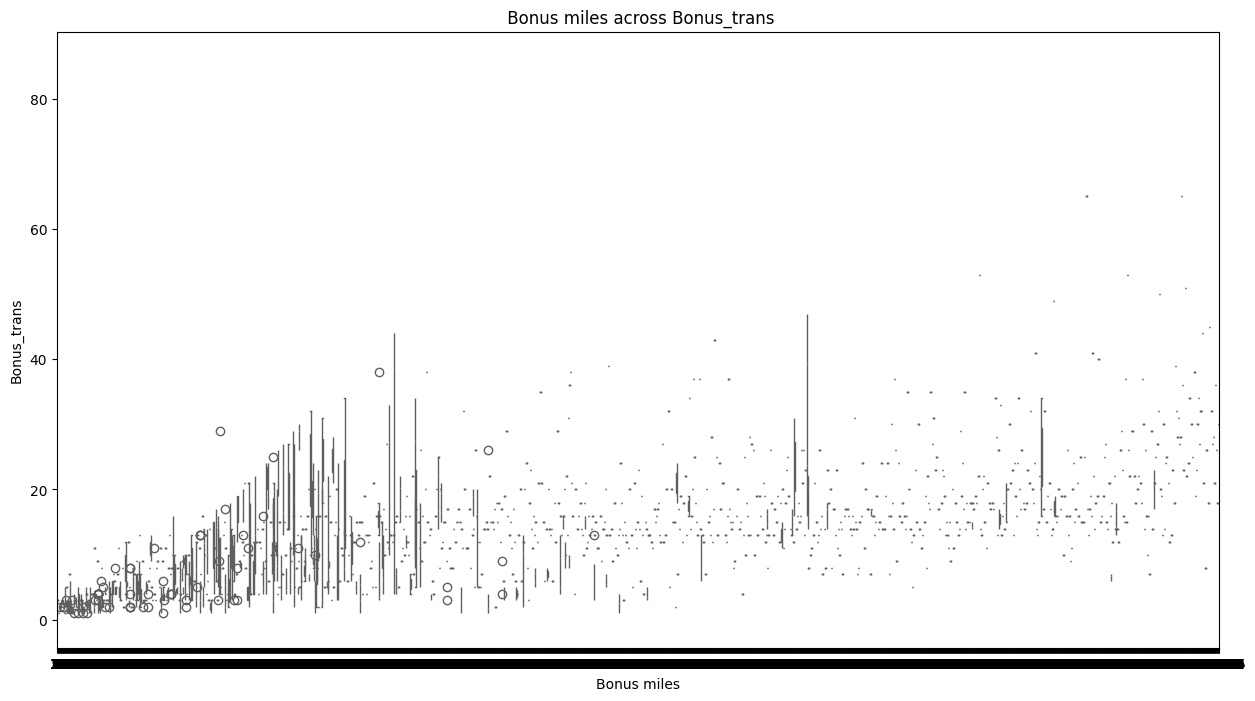

In [ ]:
plt.figure(figsize = (15,8))
sns.boxplot(x = 'Bonus_miles', y = 'Bonus_trans', data = df, palette = 'Set3')
plt.title (' Bonus miles across Bonus_trans')
plt.xlabel ('Bonus_miles')
plt.ylabel ('Bonus_trans')
plt.show()

<ipython-input-65-dd7d8e8b31cd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Flight_miles_12mo', y = 'Flight_trans_12', data = df, palette = 'Set3')


<Axes: xlabel='Flight_miles_12mo', ylabel='Flight_trans_12'>

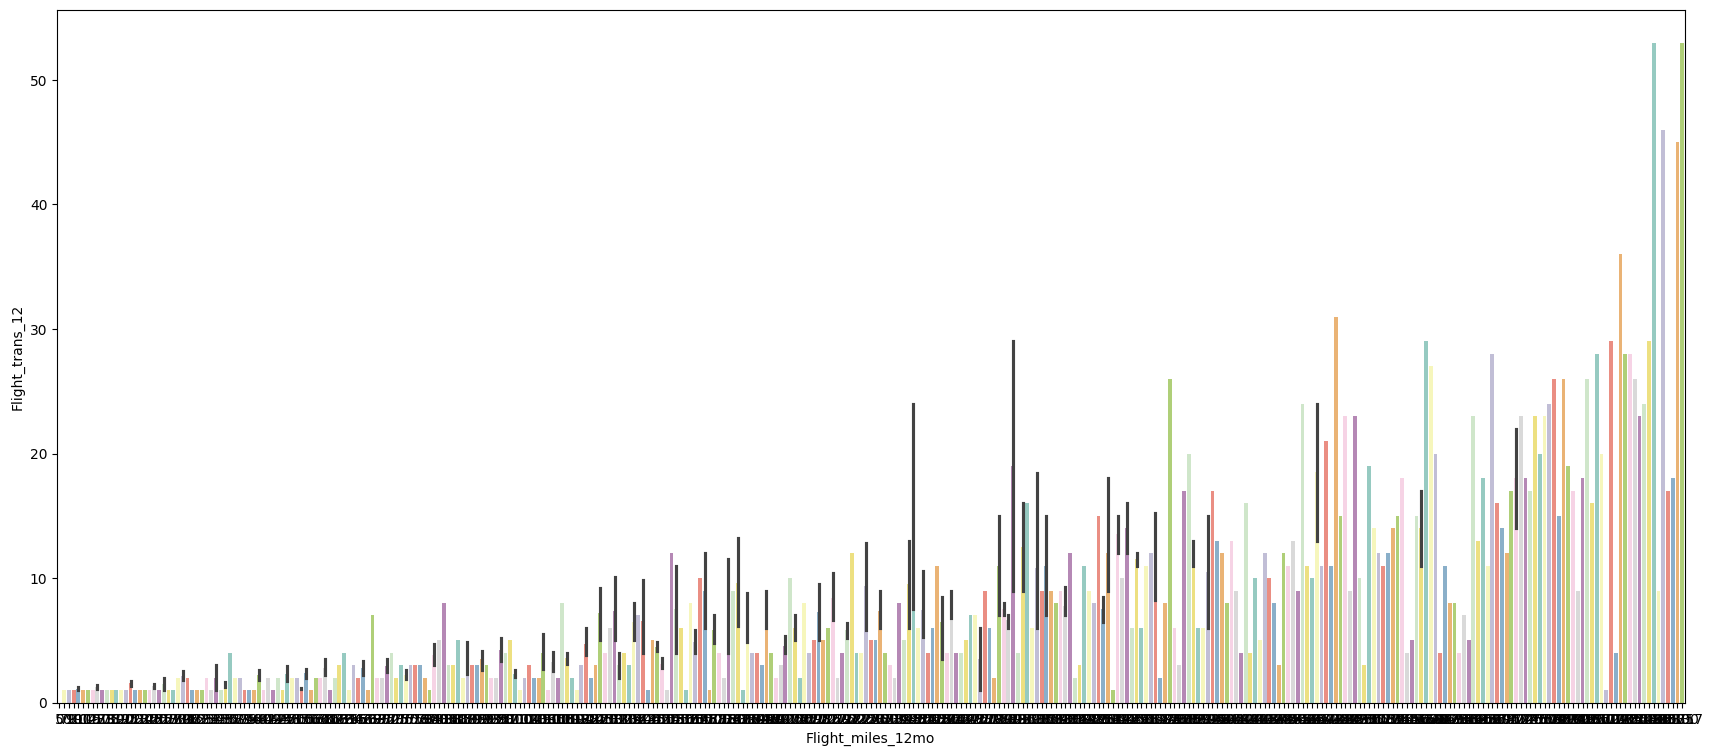

In [65]:
# Bar Plot
plt.figure(figsize = (21,9))
sns.barplot(x = 'Flight_miles_12mo', y = 'Flight_trans_12', data = df, palette = 'Set3')

<ipython-input-85-79f218569cd9>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = 'Award', y = 'Balance', data = df, palette = 'Set5')


<Axes: xlabel='Award', ylabel='Balance'>

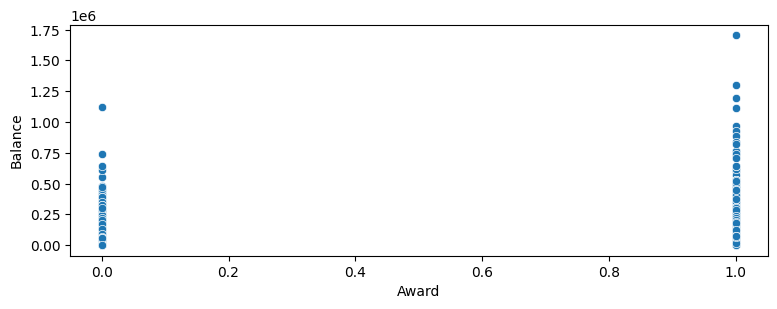

In [85]:
# Scatter Plot
plt.figure(figsize = (9,3))
sns.scatterplot(x = 'Award', y = 'Balance', data = df, palette = 'Set5')

In [108]:
Airline.index = pd.RangeIndex(len(Airline.index))
df_km = pd.concat([Airline,pd.Series(model1.labels_)],axis=1)
df_km.columns = ['Balance', 'QualMiles', 'BonusMiles', 'BonusTrans', 'FlightMiles',
       'FlightTrans', 'DaysSinceEnroll','ClusterID']

NameError: name 'model1' is not defined